In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline
sns.set(style="ticks")

In [0]:
path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"

online_rt = pd.read_csv(path, encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [0]:
countries=online_rt.groupby('Country').sum()

/home/spark-955083be-ab73-4752-8eb9-0d/.ipykernel/2897/command-9003033569351318-2716815979:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries=online_rt.groupby('Country').sum()


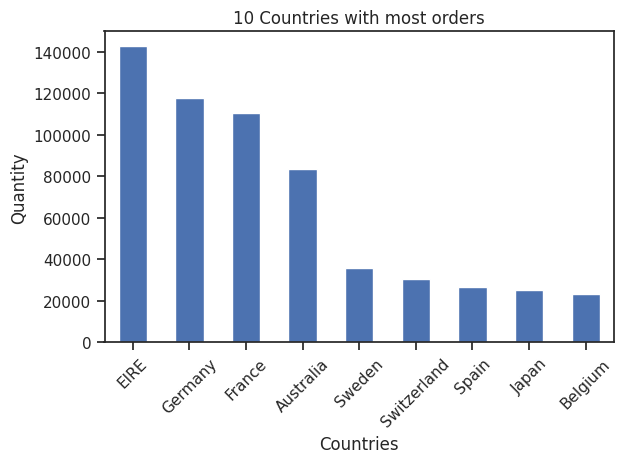

In [0]:
countries=countries.sort_values(by='Quantity',ascending=False)[1:11]
colors=plt.cm.tab10.colors
countries['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
online_rt=online_rt[online_rt.Quantity>0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


/home/spark-955083be-ab73-4752-8eb9-0d/.ipykernel/2897/command-9003033569351322-4252935239:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers=online_rt.groupby(['CustomerID','Country']).sum()
/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


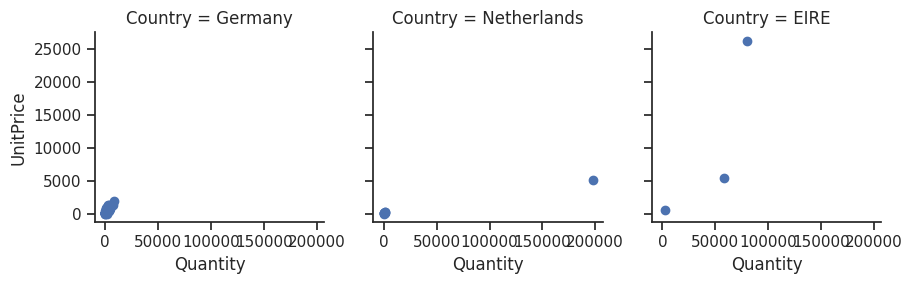

In [0]:
customers=online_rt.groupby(['CustomerID','Country']).sum()
customers=customers[customers.UnitPrice>0]
customers['Country']=customers.index.get_level_values(1)
top_countries=['Netherlands','EIRE','Germany']
customers=customers[customers['Country'].isin(top_countries)]
# Graph Section #
# creates the FaceGrid
g=sns.FacetGrid(customers,col="Country")
# maps over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
# adds legend
g.add_legend()